### Cargamos las librerias necesarias

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact 

## Cargamos los datos

In [4]:
url_nuevos   = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto13/CasosNuevosCumulativo_T.csv"
data_nuevos  = pd.read_csv(url_nuevos)
data_nuevos = data_nuevos.rename(columns = {'Region':'Fecha'})
data_nuevos.tail(5)

,Fecha,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes,Total
69,2020-05-11,11,27,36,9,5,37,964,21,13,2,33,12,2,17,0,8,1197
70,2020-05-12,0,31,95,1,8,59,1392,8,12,12,10,16,3,2,0,9,1658
71,2020-05-13,8,37,107,5,5,94,2256,24,19,13,33,13,1,34,0,11,2660
72,2020-05-14,4,67,61,1,12,90,2251,47,34,10,20,41,2,5,0,14,2659
73,2020-05-15,5,97,54,3,15,99,2060,28,21,36,41,28,5,8,0,2,2502


In [5]:
url_acumulados  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto3/CasosTotalesCumulativo_T.csv"
data_acumulados = pd.read_csv(url_acumulados)
data_acumulados = data_acumulados.rename(columns = {'Region':'Fecha'})
data_acumulados.tail(5)

,Fecha,Arica y Parinacota,Tarapacá,Antofagasta,Atacama,Coquimbo,Valparaíso,Metropolitana,O’Higgins,Maule,Ñuble,Biobío,Araucanía,Los Ríos,Los Lagos,Aysén,Magallanes,Total
69,2020-05-11,351,547,1014,133,140,970,21317,216,454,814,932,1466,208,592,8,901,30063
70,2020-05-12,351,578,1109,134,148,1029,22709,224,466,826,942,1482,211,594,8,910,31721
71,2020-05-13,359,615,1216,139,153,1123,24965,248,485,839,975,1495,212,628,8,921,34381
72,2020-05-14,363,682,1277,140,165,1213,27216,295,519,849,995,1536,214,633,8,935,37040
73,2020-05-15,368,779,1331,143,180,1312,29276,323,540,885,1036,1564,219,641,8,937,39542


## Nuevos contagios por dìa vs contagios totales

In [6]:
def graph(region):
    fechas        = data_nuevos["Fecha"].values.tolist()
    casos_nuevos  = data_nuevos[region].values.tolist()
    casos_totales = data_acumulados[region].values.tolist()
    
    plt.figure(figsize=(20,15))
    plt.plot(casos_totales, casos_nuevos, 'bo-')
    plt.title("Region: " + region)
    plt.grid()
    plt.xlabel('Casos totales')
    plt.ylabel('Casos nuevos')
    #plt.xscale('log')
    #plt.yscale('log')
    plt.show()

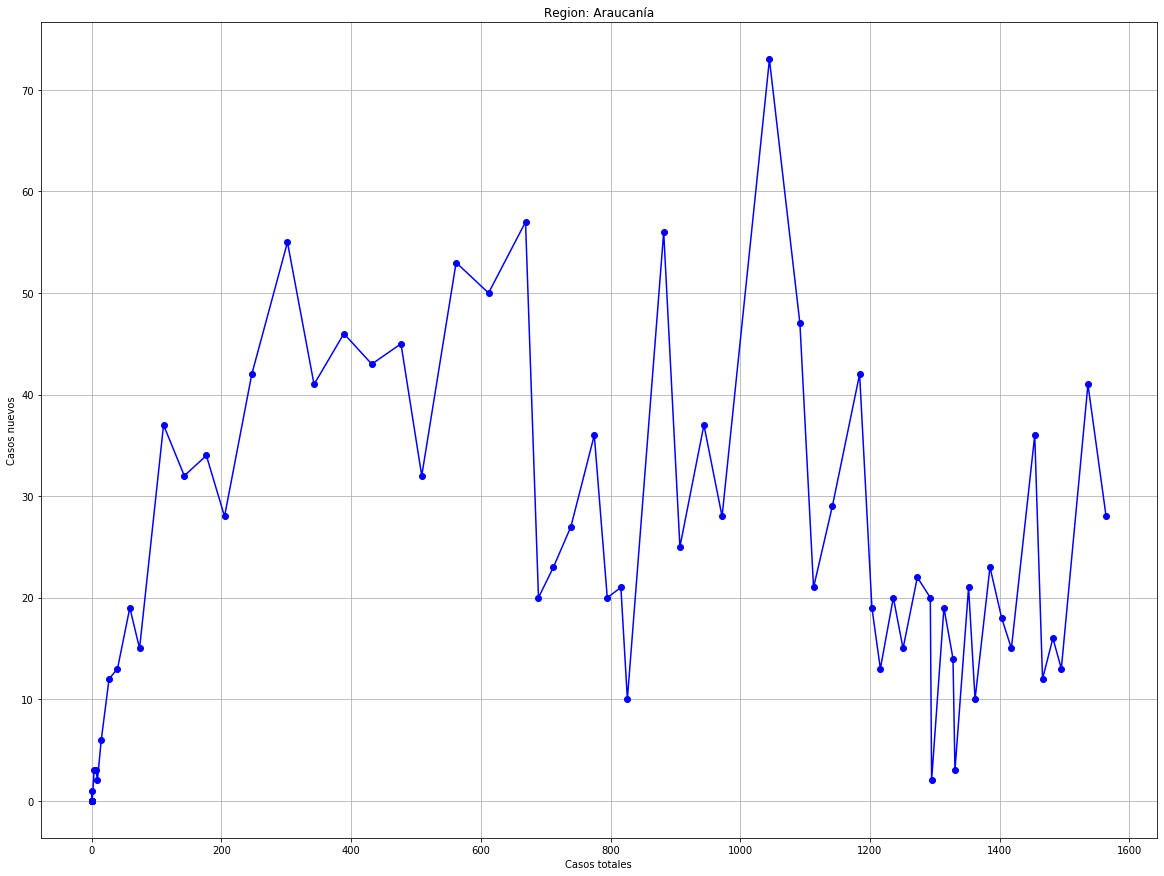

In [7]:
graph("Araucanía")

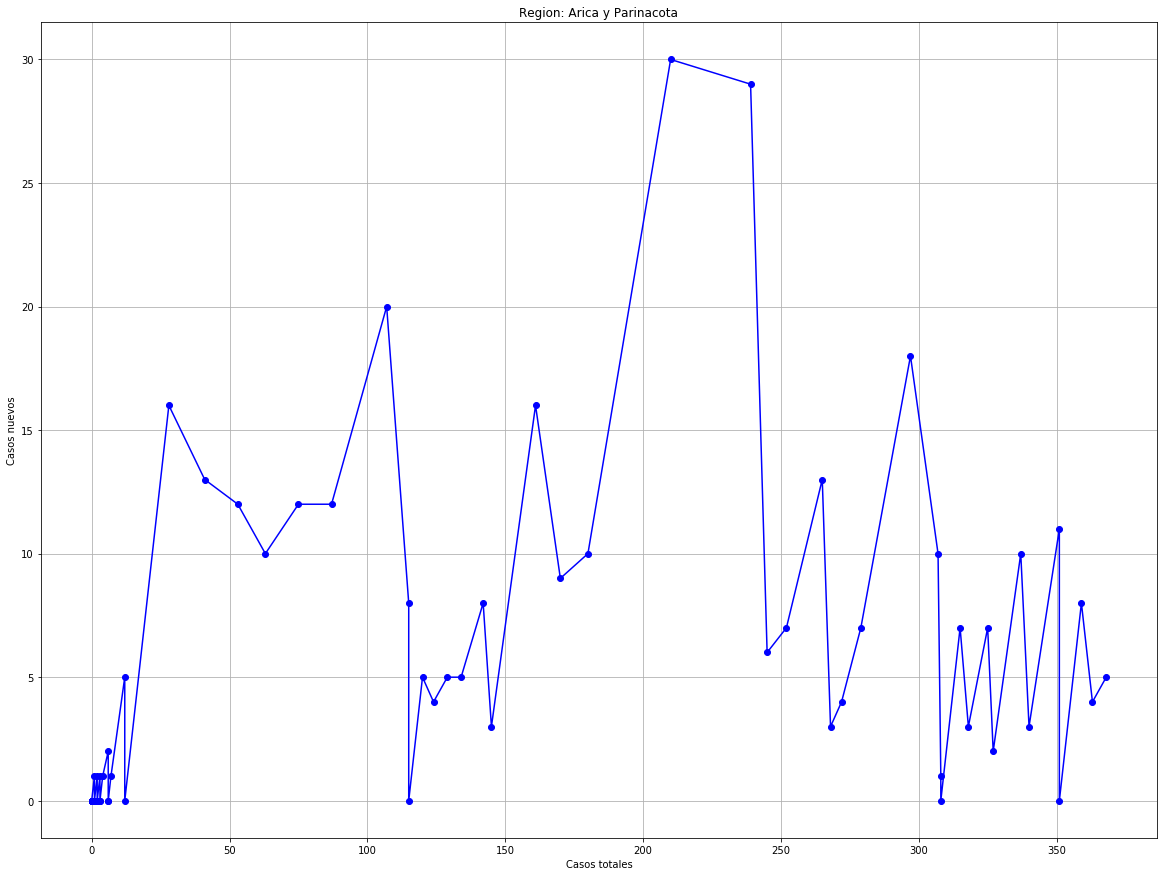

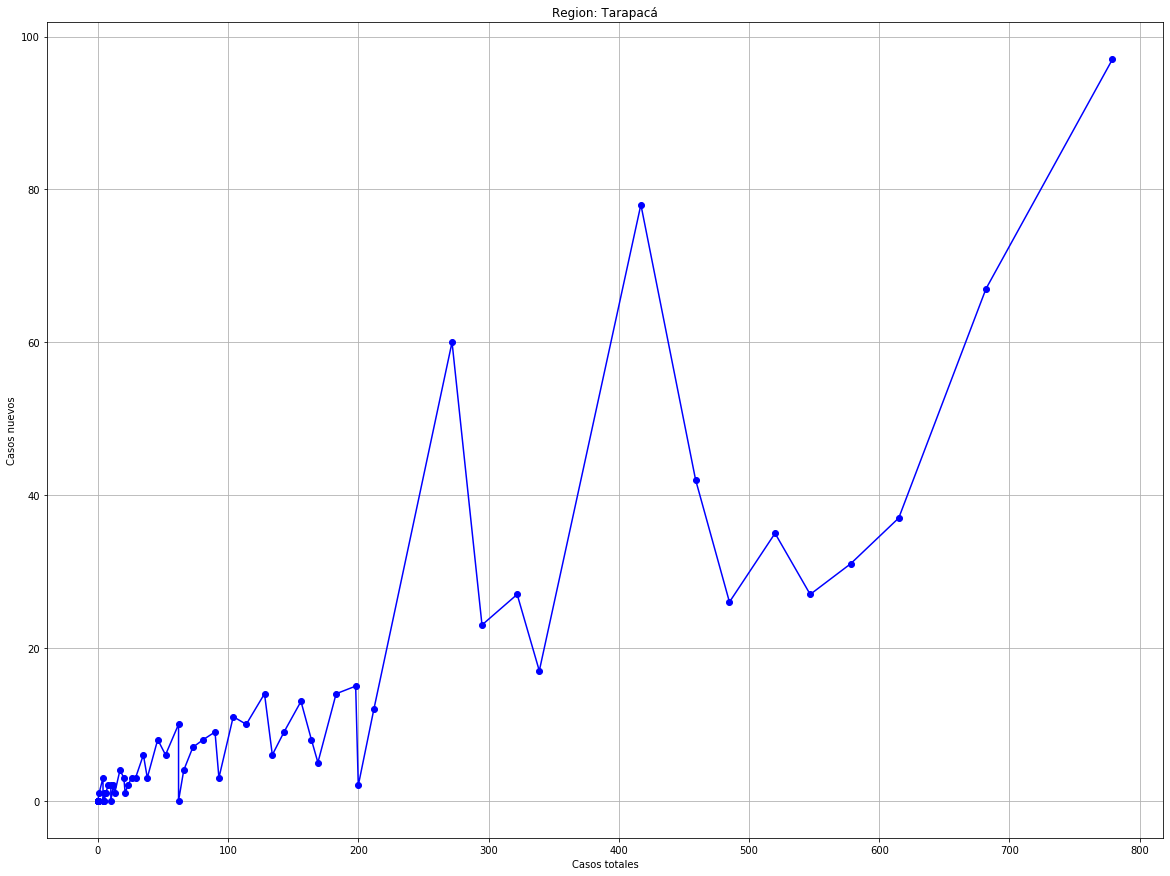

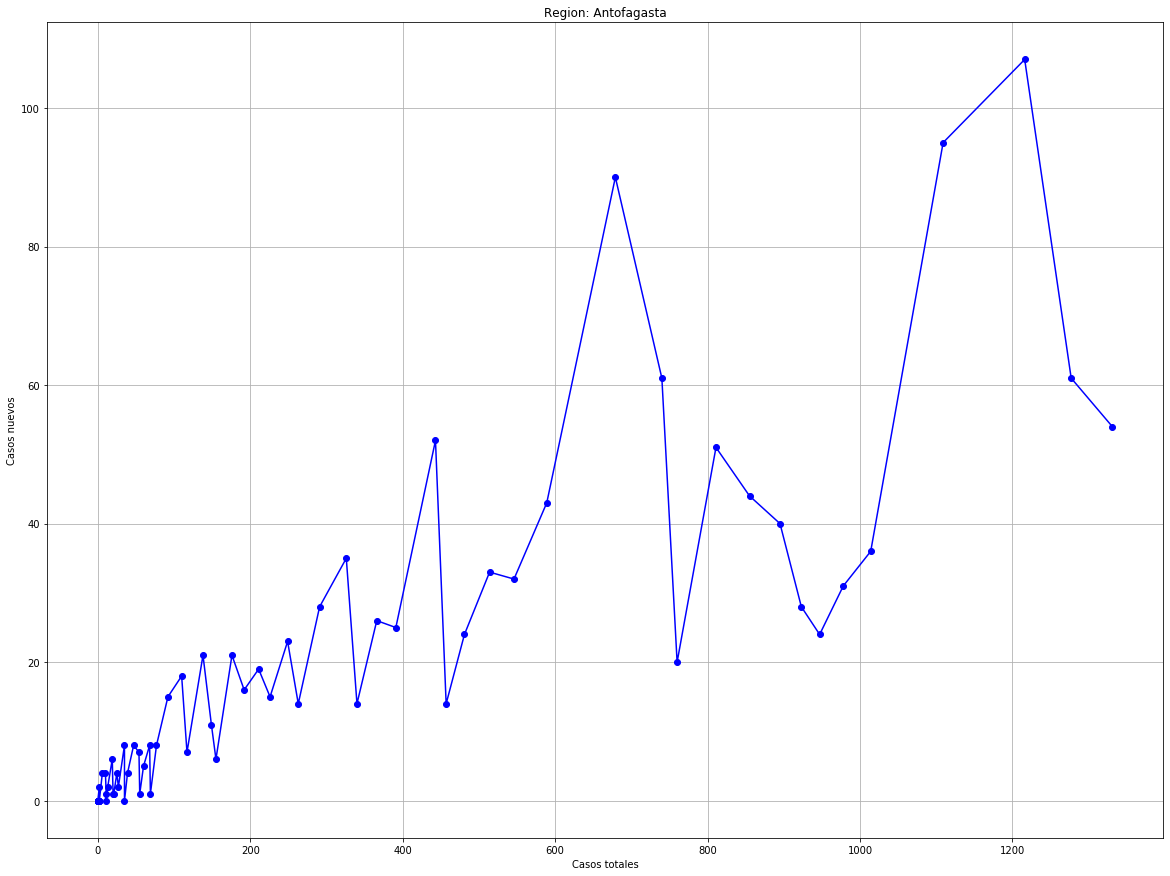

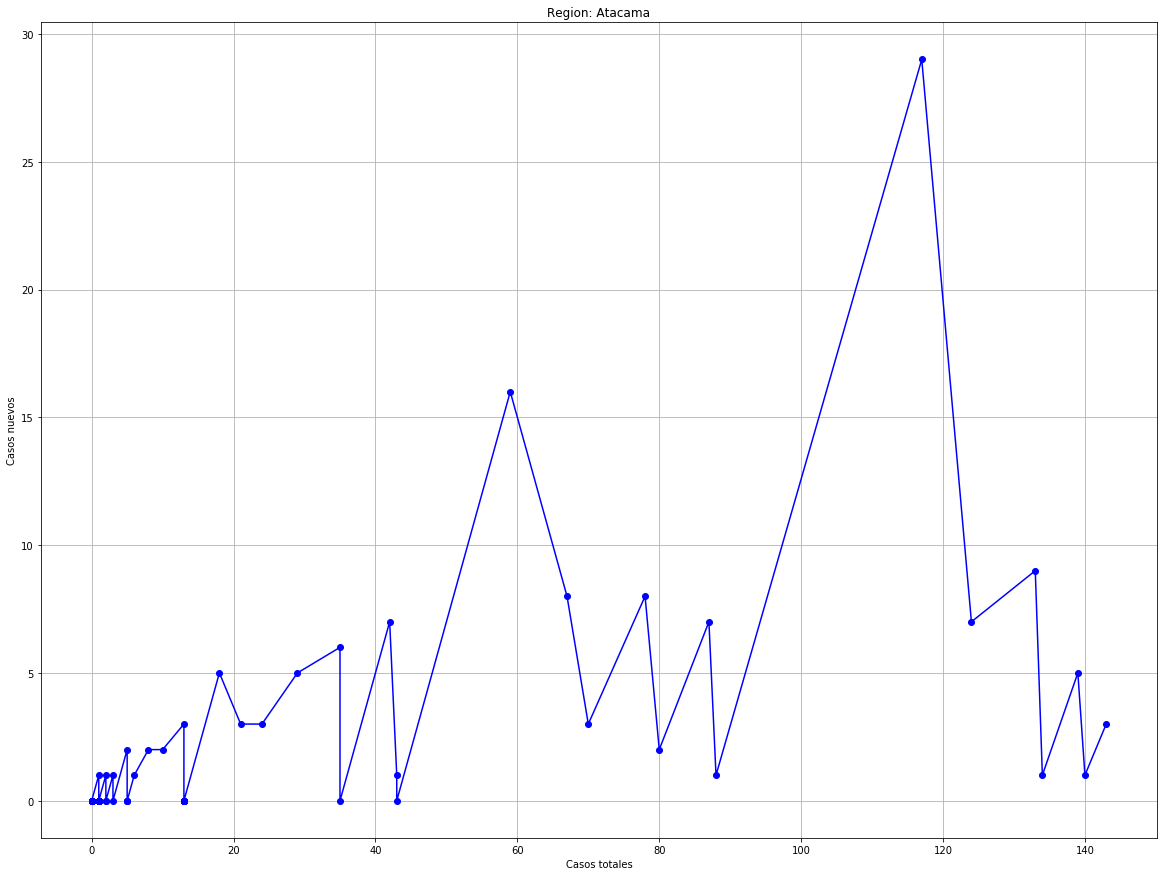

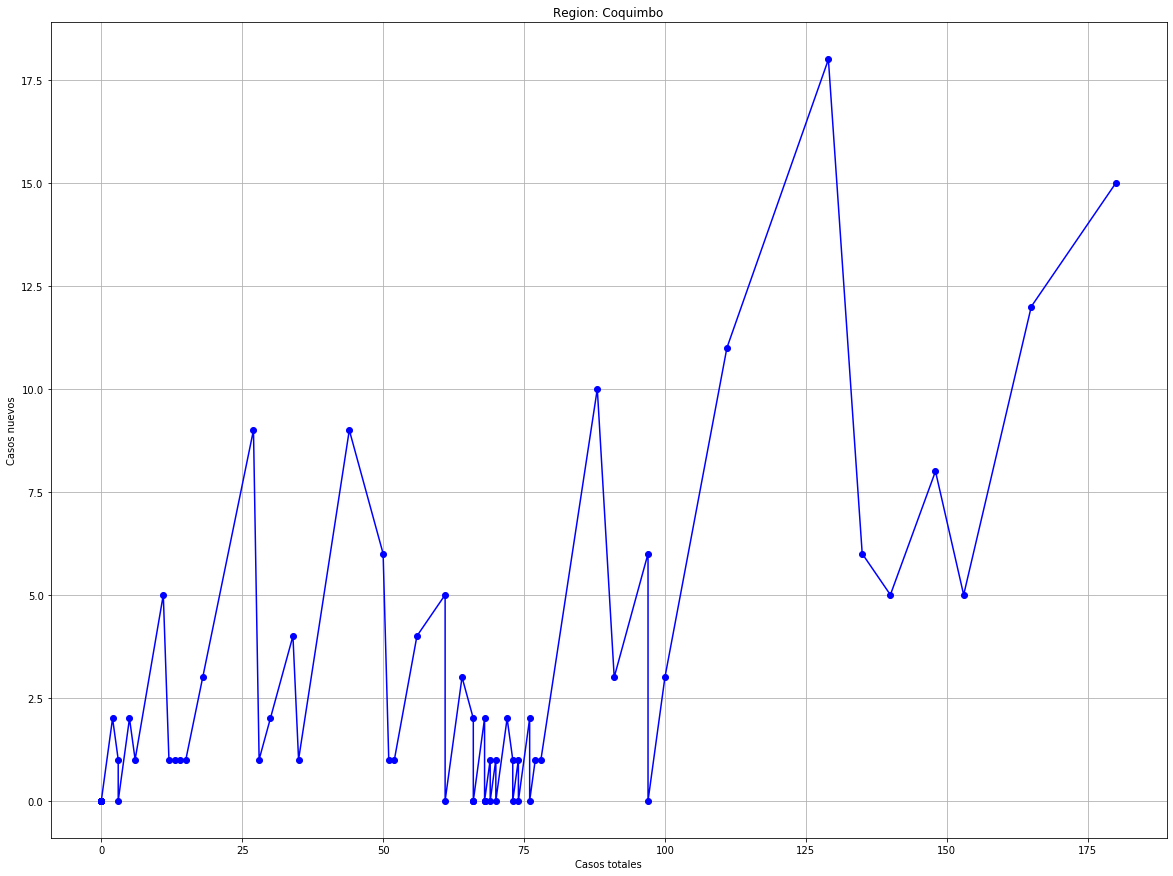

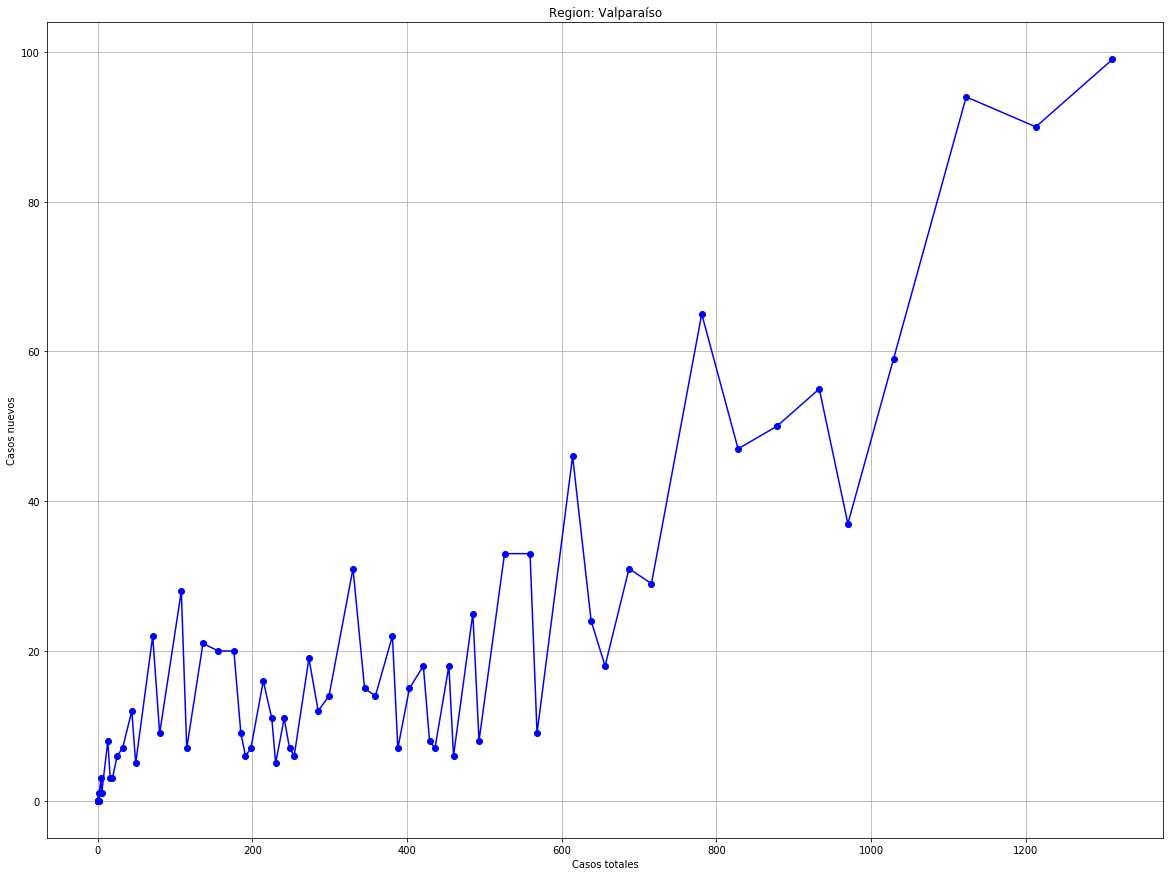

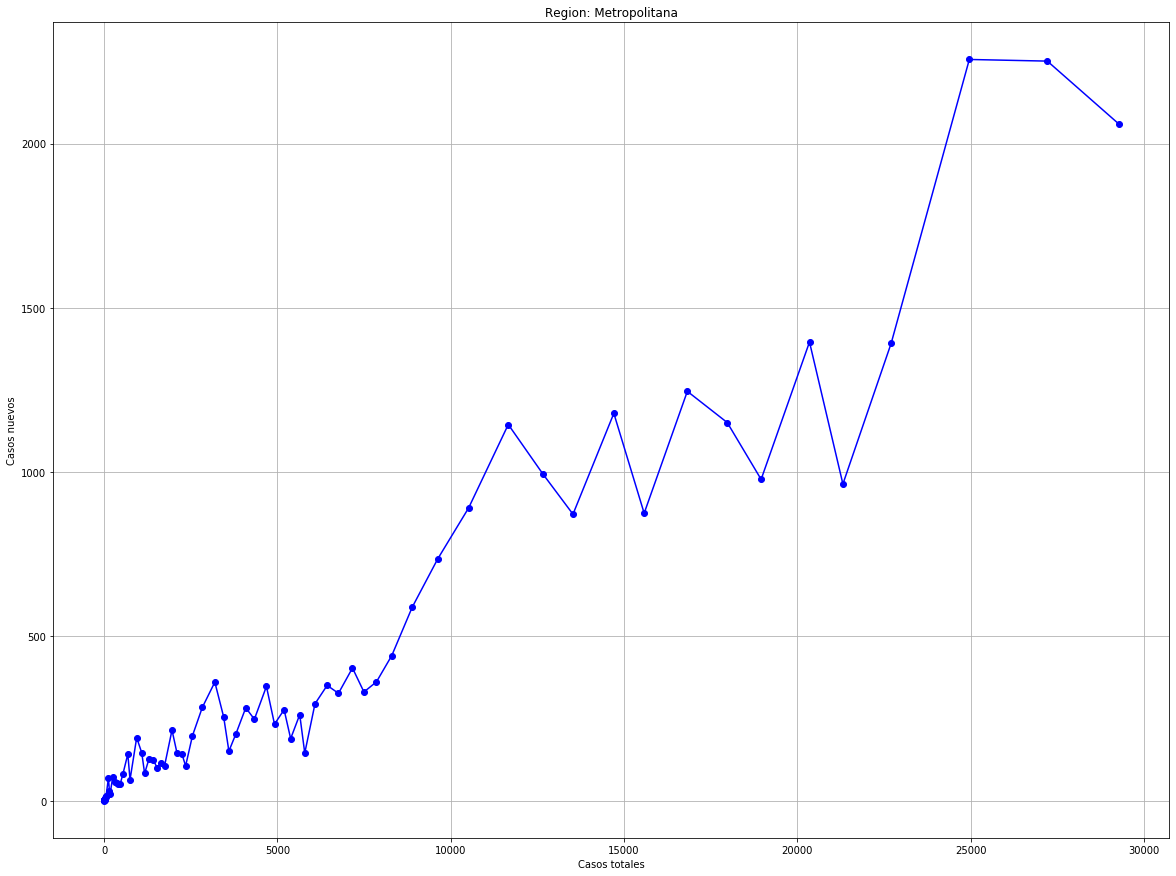

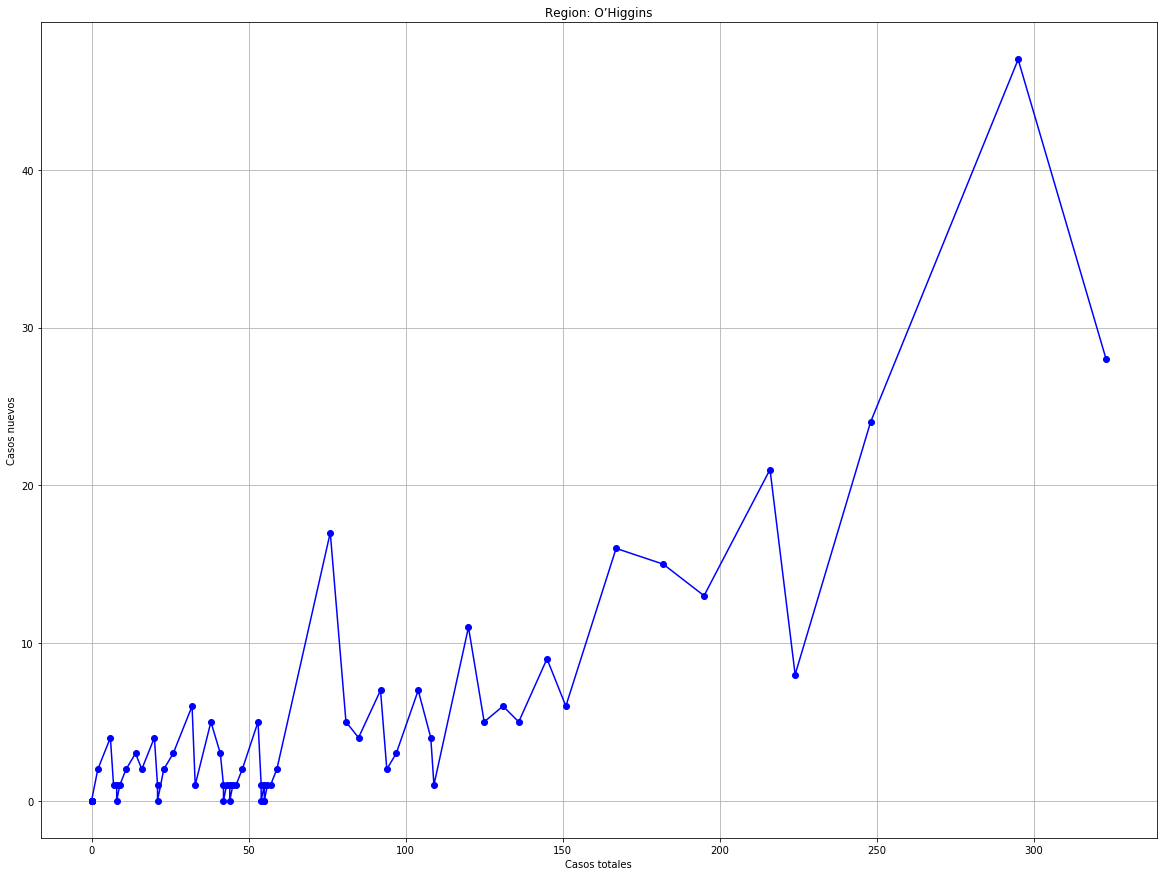

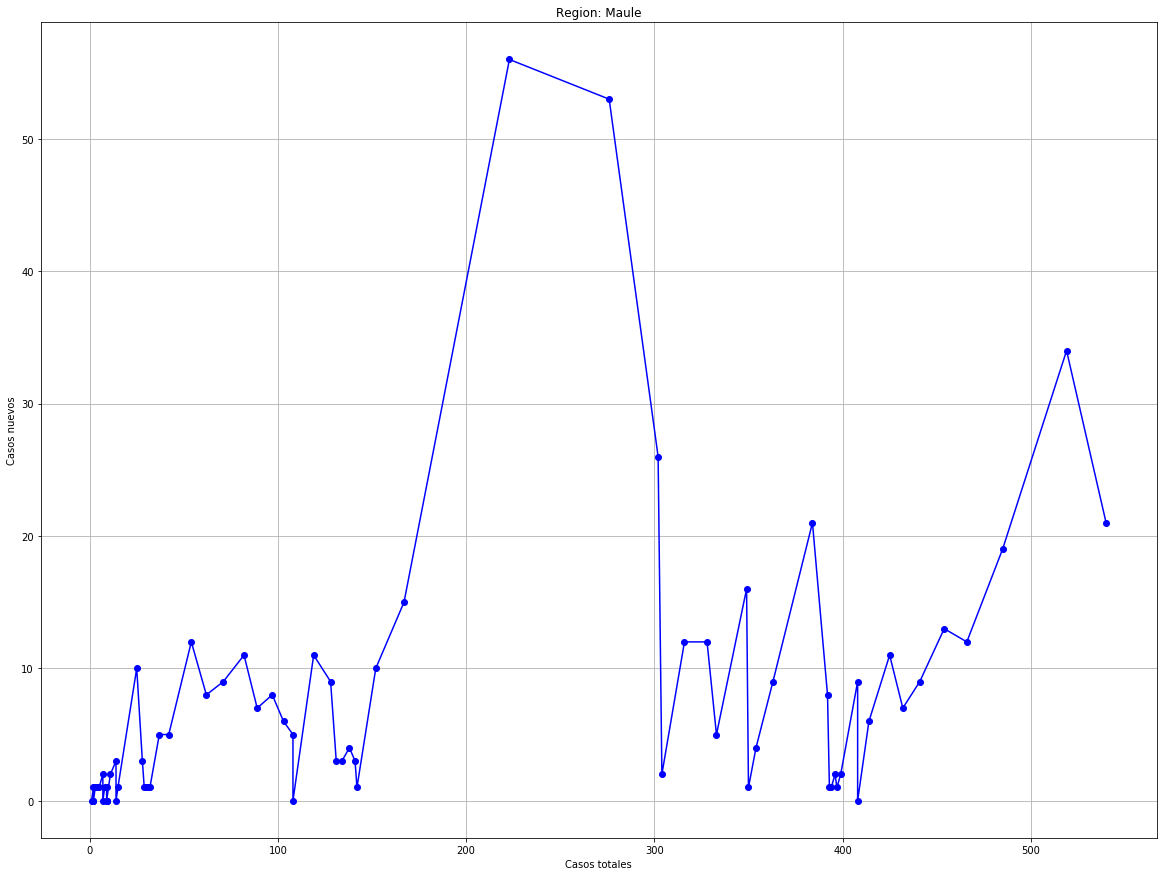

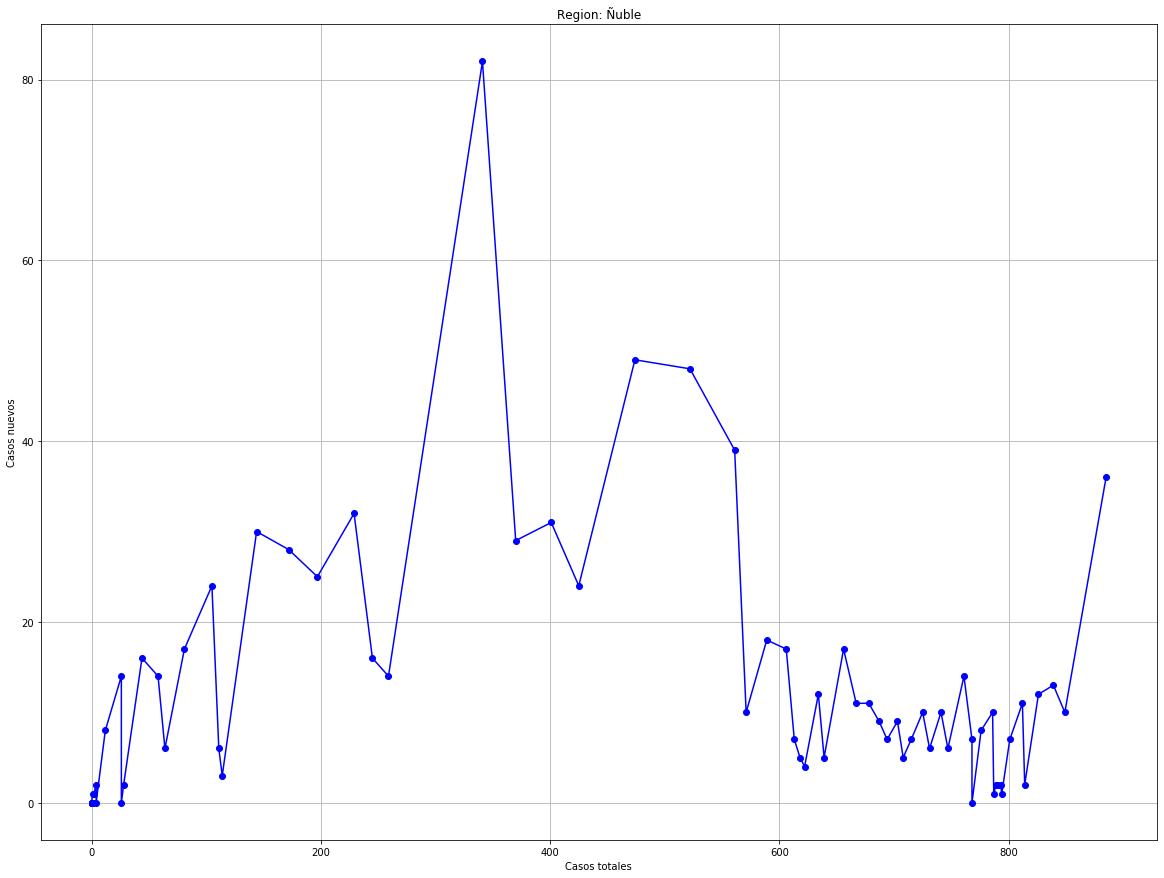

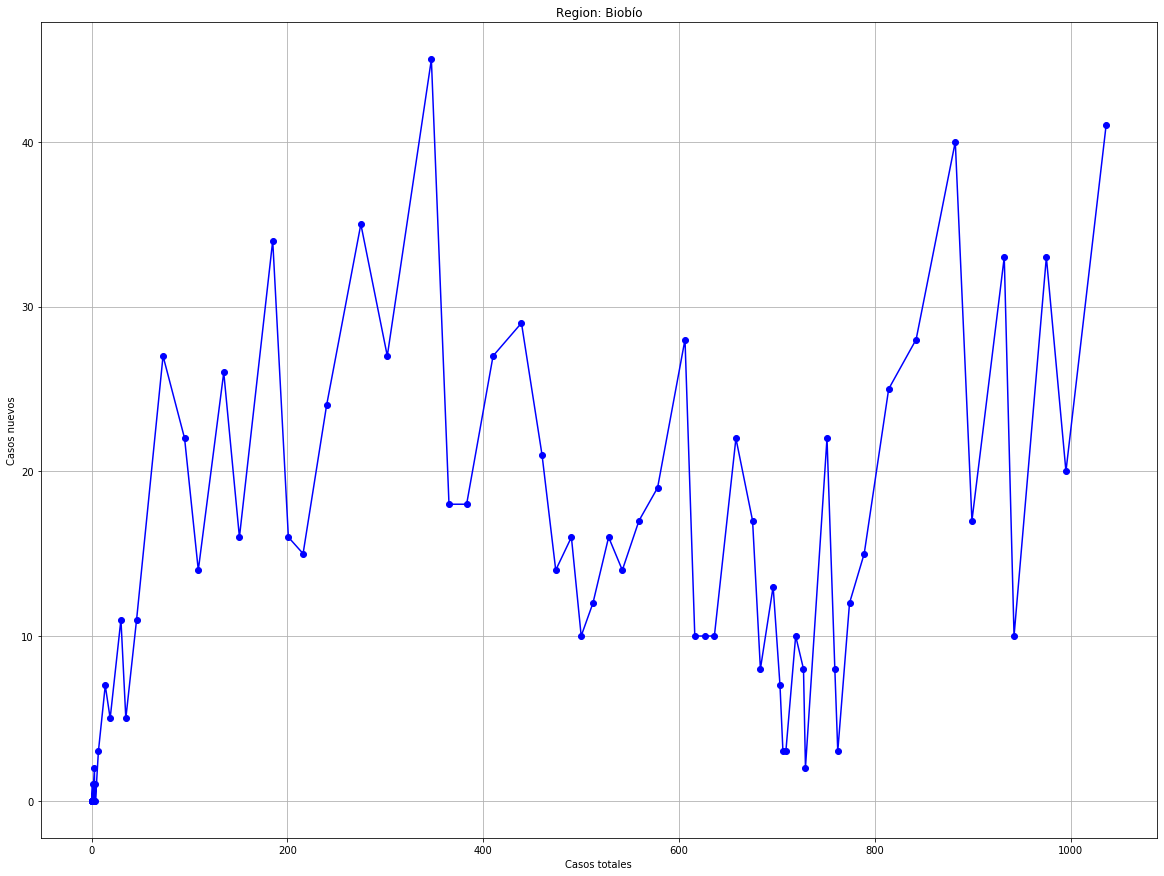

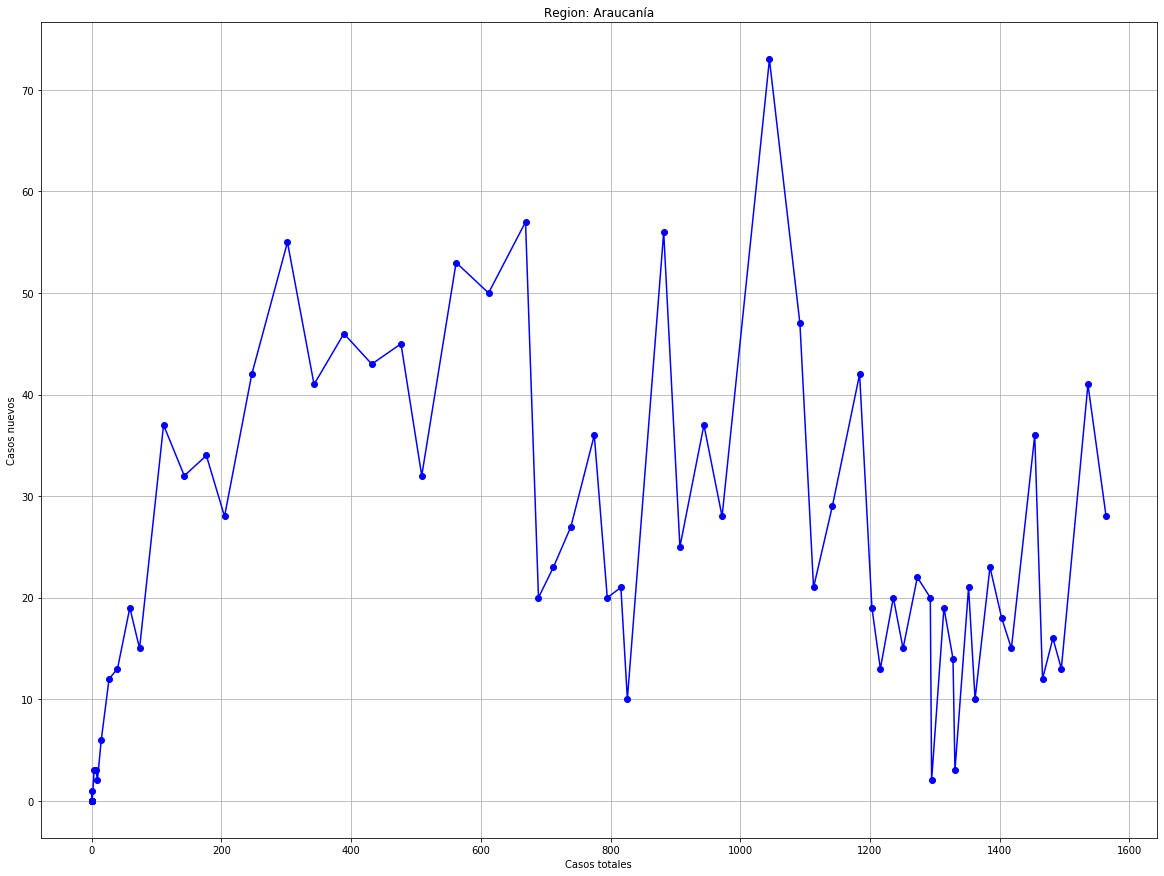

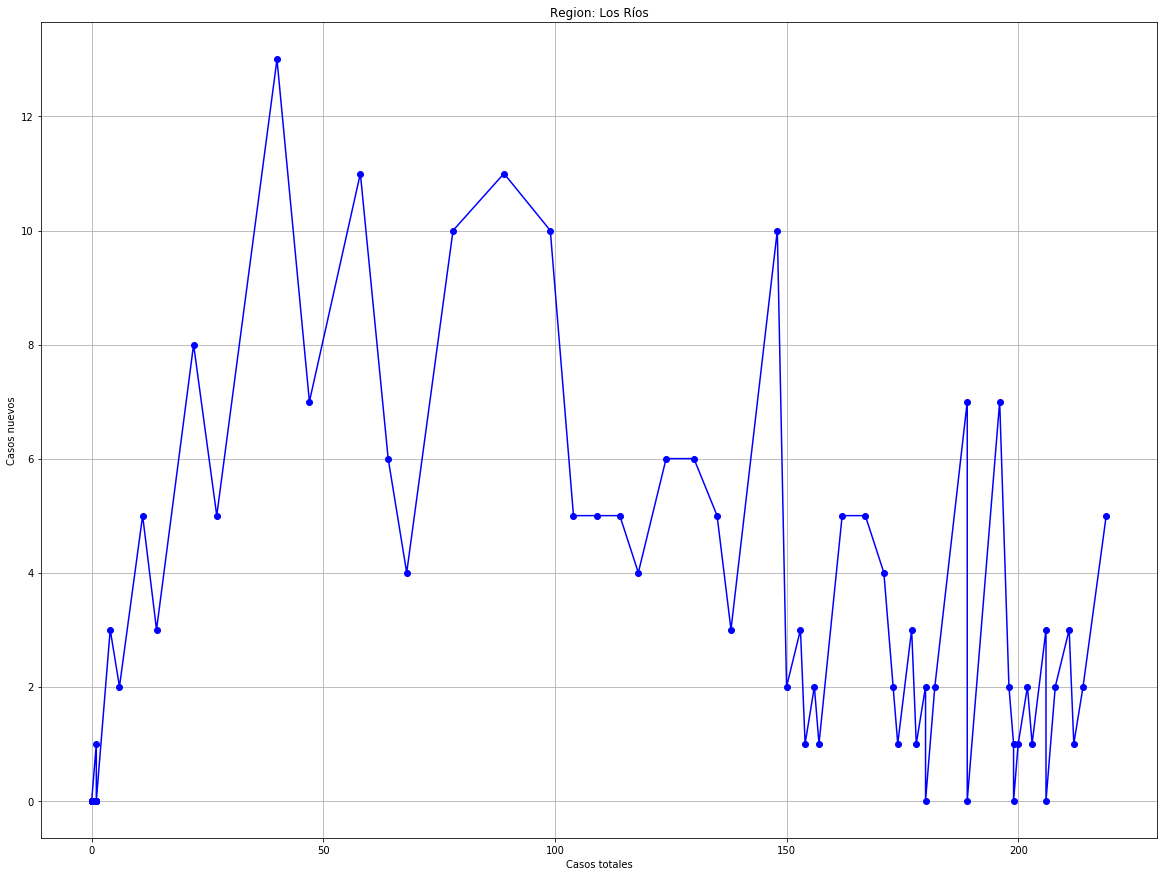

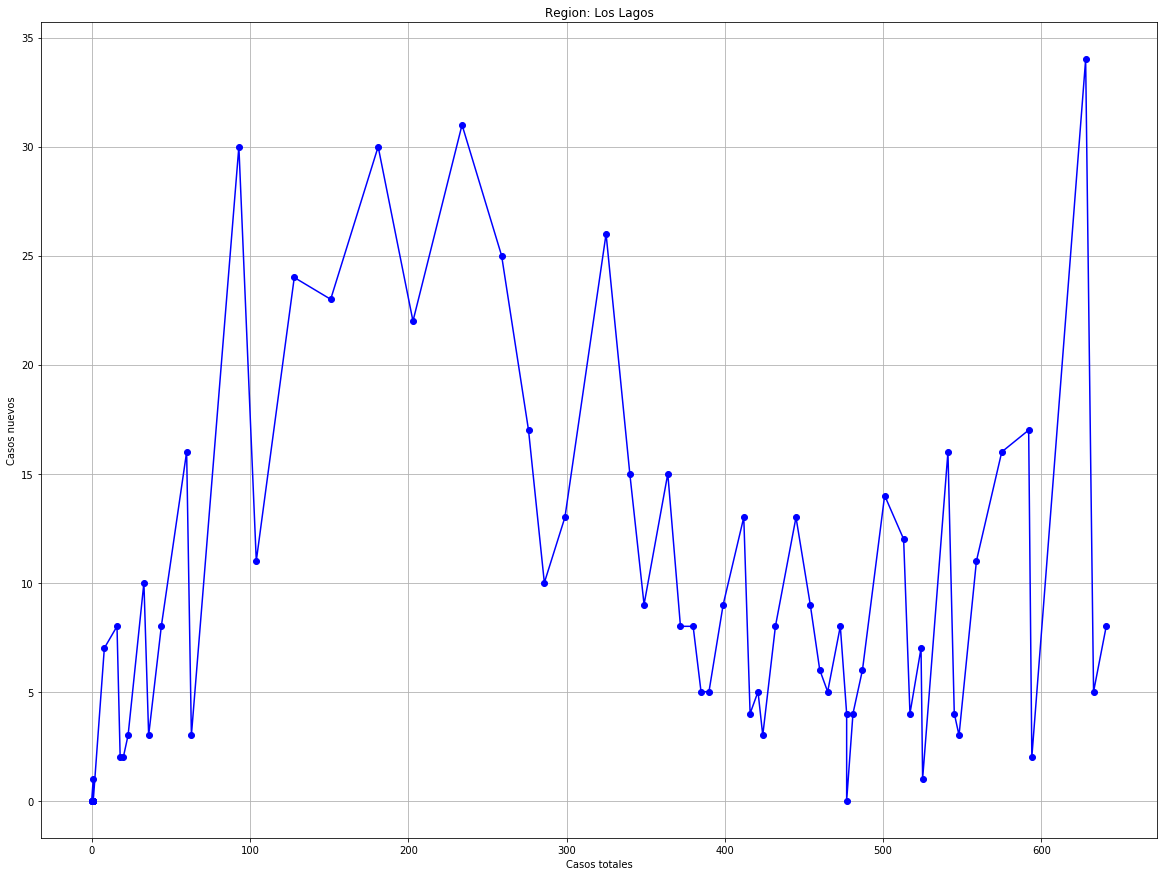

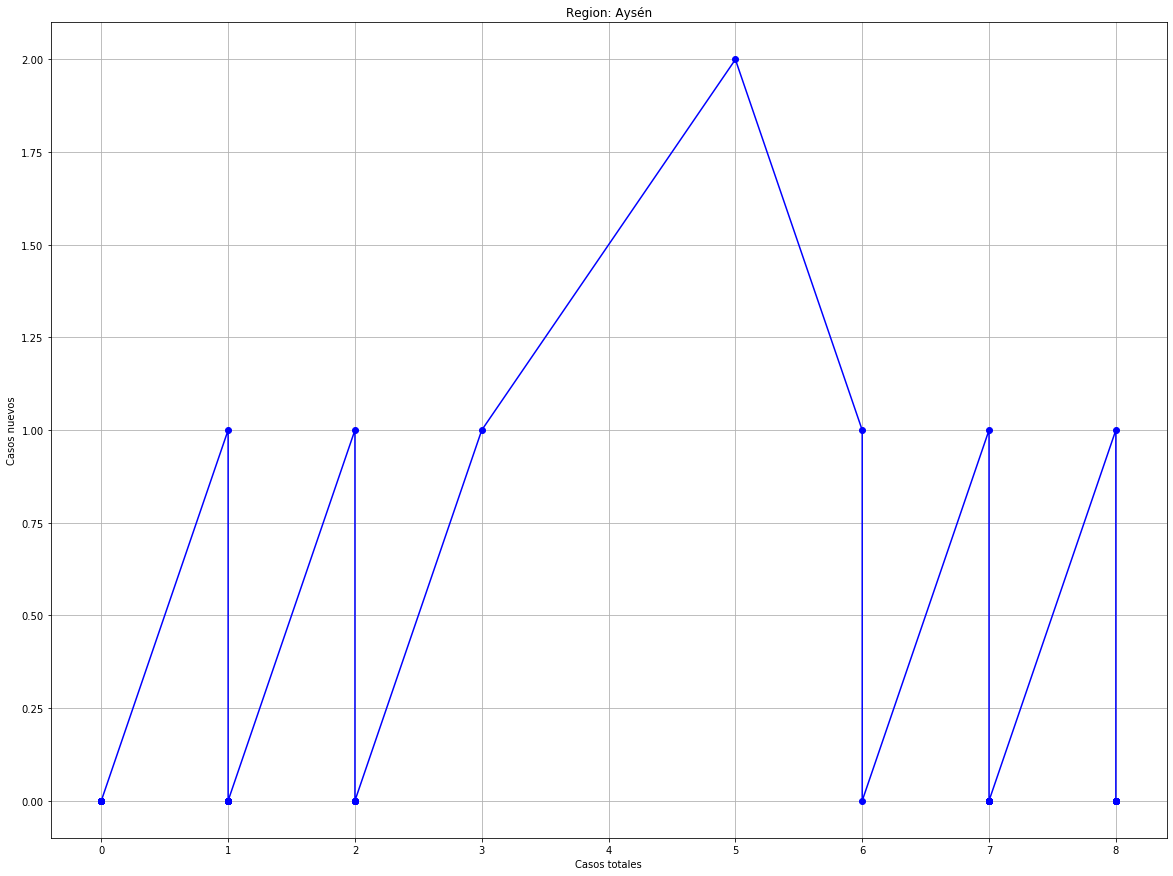

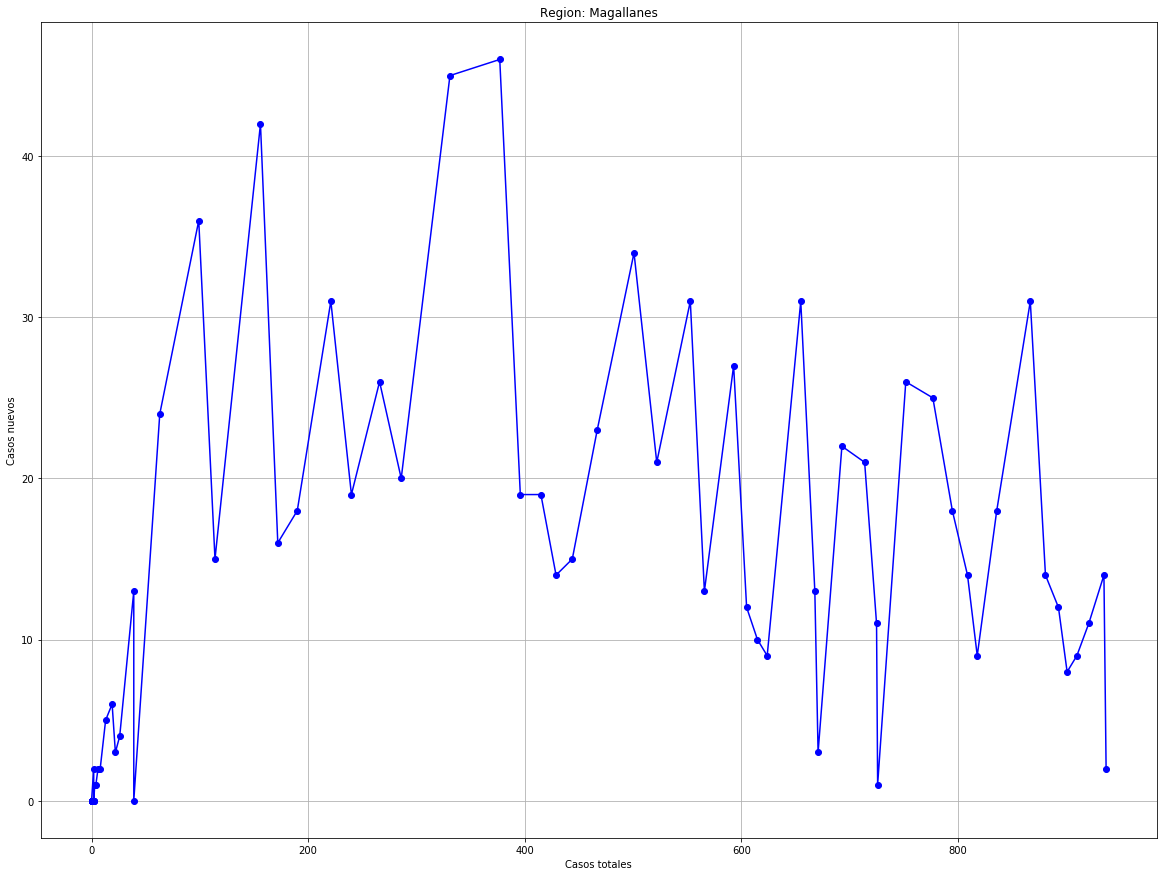

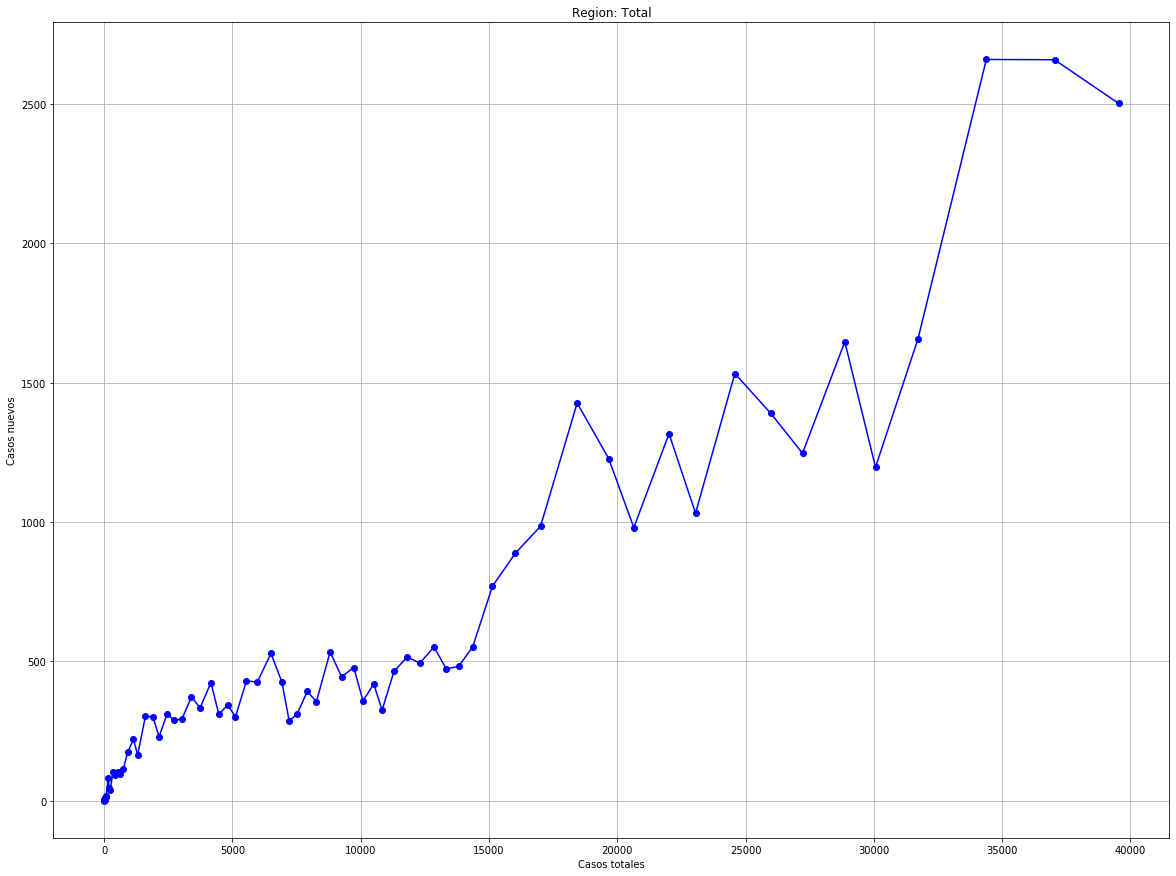

In [8]:
regiones = data_acumulados.columns[1:]
for region in regiones:
    graph(region)

In [9]:
interact(graph,
         region = regiones)
None

interactive(children=(Dropdown(description='region', options=('Arica y Parinacota', 'Tarapacá', 'Antofagasta',…